# 0. Import Estimator API Module

In [1]:
import sys
sys.path.append('../../')

In [2]:
from aistudio.torchestimator import TorchEstimator

In [3]:
print(TorchEstimator)

<class 'aistudio.torchestimator.TorchEstimator'>


In [4]:
print(sys.path)

['/home/sky/dev/aistudio/workspace/ws-1', '/home/sky/anaconda3/envs/ai/lib/python37.zip', '/home/sky/anaconda3/envs/ai/lib/python3.7', '/home/sky/anaconda3/envs/ai/lib/python3.7/lib-dynload', '', '/home/sky/anaconda3/envs/ai/lib/python3.7/site-packages', '/home/sky/tmp/jupyterlab-git', '/home/sky/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/extensions', '/home/sky/.ipython', '../../']


In [5]:
import inspect
print(inspect.getfile(TorchEstimator))

../../aistudio/torchestimator.py


# New Scenario2

<div class="alert alert-block alert-info">
<h1>Example 1(MNIST-deeplearning.net)</h1>
</div>

<div class="alert alert-block alert-info">
Feel free to change modulename
</div>

In [ ]:
# USER-DEFINED
modulename = "mnist-linear"
######### DO NOT CHANGE #########
net_filename = modulename + ".py"
net_filename = "./net/" + net_filename
#################################

<div class="alert alert-block alert-warning">
    <p>Do not change code below at Line 1 to 3 </p>
    <p>Do not change class name <b>'Net'</b></p>
</div>

In [ ]:
%%writefile $net_filename
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

In [ ]:
# dataset_name(USER-DEFINED) - Feel free to change
dataset_name = "MNIST"
######### DO NOT CHANGE #########
dataset_filename = dataset_name + ".py"
dataset_filename = "./dataset/" + dataset_filename
#################################

In [ ]:
%%writefile $dataset_filename

from pathlib import Path
import requests
import pickle
import gzip
import numpy as np
from torch.utils.data import TensorDataset
import torch
import os

class DatasetLoader:
    
    def __init__(self):
        ########## WRITE DATASET LOADER CODE HERE ##########
        
        DATA_PATH = Path("dataset")
        PATH = DATA_PATH / "mnist"

        PATH.mkdir(parents=True, exist_ok=True)

        URL = "http://deeplearning.net/data/mnist/"
        FILENAME = "mnist.pkl.gz"

        if not (PATH / FILENAME).exists():
                content = requests.get(URL + FILENAME).content
                (PATH / FILENAME).open("wb").write(content)

        with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
                ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")       

        x_train, y_train, x_valid, y_valid = map(
            torch.tensor, (x_train, y_train, x_valid, y_valid)
        )
        ### train_ds and valid_ds MUST BE TensorDataset(or ImageFolder or Torch Dataset Format)
        self.train_dataset = TensorDataset(x_train, y_train)
        self.valid_dataset = TensorDataset(x_valid, y_valid)
        ####################################################
        
    def get_train_dataset(self, validation=True):        
        if validation is True:
            return self.train_dataset, self.valid_dataset
        else:
            return self.train_dataset
    
    def get_test_dataset(self):
        return self.test_dataset

In [ ]:
script_params = {
    'epochs':5,
    'batch-size':64,
    'test-batch-size':128,
    'lr':0.01,
    'momentum':0.5,
    'seed':42,
    'log-interval':10,
    #'no-cuda':False,
    'nprocs':8,
    'loss':'cross_entropy',
    #'loss':'nll_loss',
    'optimizer':'SGD',
    'validation': True,
    'debug': True
}

In [ ]:
estimator = TorchEstimator(net_name=modulename,script_params=script_params)

In [ ]:
estimator.fit(dataset_loader=dataset_name)

In [ ]:
estimator.monitor()

### register model

In [ ]:
estimator.register_model(model_name="mnist-linear-model")

<div class="alert alert-block alert-info">
<h1>Example 2(MNIST-torchvision)</h1>
</div>

<div class="alert alert-block alert-info">
Feel free to change modulename
</div>

In [ ]:
# USER-DEFINED
modulename = "mnist-CNN"
######### DO NOT CHANGE #########
net_filename = modulename + ".py"
net_filename = "./net/" + net_filename
#################################

<div class="alert alert-block alert-warning">
    <p>Do not change code below at Line 1 to 3 </p>
    <p>Do not change class name <b>'Net'</b></p>
</div>

In [ ]:
%%writefile $net_filename
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

<div class="alert alert-block alert-info">
Feel free to change dataset name
</div>

In [ ]:
# USER-DEFINED
dataset_name = "MNIST2"
######### DO NOT CHANGE #########
dataset_filename = dataset_name + ".py"
dataset_filename = "./dataset/" + dataset_filename
#################################

In [ ]:
%%writefile $dataset_filename

from torchvision import datasets, transforms
import os

class DatasetLoader:    
    def __init__(self):
        ########## WRITE DATASET LOADER CODE HERE ##########
        thispath = os.path.dirname(os.path.abspath(__file__))
        data_dir = os.path.join(thispath,"MNIST2")
        mnist_transform=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))])
        train_dataset = datasets.MNIST(data_dir, transform=mnist_transform, train=True,  download=True)        
        test_dataset  = datasets.MNIST(data_dir, transform=mnist_transform, train=False, download=True)
        
        ### train_ds and valid_ds MUST BE TensorDataset(or ImageFolder or Torch Dataset Format)
        self.train_dataset = train_dataset
        self.valid_dataset = test_dataset
        self.test_dataset = test_dataset
        ####################################################
    
    def get_train_dataset(self, validation=True):        
        if validation is True:
            return self.train_dataset, self.valid_dataset
        else:
            return self.train_dataset
    
    def get_test_dataset(self):
        return self.test_dataset

In [ ]:
script_params = {
    'epochs':5,
    'batch-size':64,
    'test-batch-size':128,
    'lr':0.01,
    'momentum':0.5,
    'seed':42,
    'log-interval':10,
    #'no-cuda':False,
    'nprocs':1,
    #'loss':'cross_entropy',
    'loss':'nll_loss',
    'optimizer':'SGD',
    'validation': True,
    'debug': True    
}

In [ ]:
estimator = TorchEstimator(net_name=modulename,script_params=script_params)

In [ ]:
estimator.fit(dataset_loader=dataset_name)

In [ ]:
estimator.monitor(timeout=10.0)

### predict by the model

In [ ]:
estimator.predict()

### register model

In [ ]:
estimator.register_model(model_name="mnist-good-model")

### get model

In [ ]:
model = estimator.get_model()

### prediction by cpu

In [ ]:
from torchvision import datasets, transforms
import os
import torch

data_dir = "./dataset/MNIST-TEST"
mnist_transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))])
test_dataset  = datasets.MNIST(data_dir, transform=mnist_transform, train=False, download=True)
batch_size = 32
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('0','1','2','3','4','5','6','7','8','9')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
with torch.no_grad():
    for idx, data in enumerate(testloader):
        images, labels = data        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)        
        c = (predicted == labels).squeeze()
        for i in range(len(data)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %2s : %3d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

# if you only want to use trained model and predict, let's do this below.

In [ ]:
import sys
sys.path.append('../../')

In [ ]:
from aistudio.torchestimator import TorchEstimator

In [ ]:
script_params = {
    'epochs':5,
    'batch-size':64,
    'test-batch-size':128,
    'lr':0.01,
    'momentum':0.5,
    'seed':42,
    'log-interval':10,
    #'no-cuda':False,
    'nprocs':1,
    #'loss':'cross_entropy',
    'loss':'nll_loss',
    'optimizer':'SGD',
    'validation': True,
    'debug': True    
}

In [ ]:
trained_model_name = "mnist-good-model"
estimator = TorchEstimator(model_name=trained_model_name,script_params=script_params)

In [ ]:
dataset_name = "MNIST2"
estimator.predict(dataset_loader=dataset_name)

<div class="alert alert-block alert-info">
<h1>Example 3(CIFAR10)</h1>
</div>

In [ ]:
# USER-DEFINED - Feel free to change
modulename = "CIFAR10-CNN"
######### DO NOT CHANGE #########
net_filename = modulename + ".py"
net_filename = "./net/" + net_filename
#################################

<div class="alert alert-block alert-warning">
    <p>Do not change code below at Line 1 to 3 </p>
    <p>Do not change class name <b>'Net'</b></p>
</div>

In [ ]:
%%writefile $net_filename
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

<div class="alert alert-block alert-info">
Feel free to change dataset name
</div>

In [ ]:
# USER-DEFINED
dataset_name = "CIFAR10"
######### DO NOT CHANGE #########
dataset_filename = dataset_name + ".py"
dataset_filename = "./dataset/" + dataset_filename
#################################

In [ ]:
%%writefile $dataset_filename

from __future__ import print_function, division

import torch
import torchvision
from torchvision import datasets, models, transforms
import os

class DatasetLoader:    
    def __init__(self):
        ########## WRITE DATASET LOADER CODE HERE ##########
        transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        thispath = os.path.dirname(os.path.abspath(__file__))
        data_dir = os.path.join(thispath,"CIFAR10")
        trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True,
                                                download=True, transform=transform)
        testset = torchvision.datasets.CIFAR10(root=data_dir, train=False,
                                               download=True, transform=transform)
        self.train_dataset = trainset
        self.valid_dataset = testset
        self.test_dataset = testset
        ####################################################
        
    def get_train_dataset(self, validation=True):        
        if validation is True:
            return self.train_dataset, self.valid_dataset
        else:
            return self.train_dataset
    
    def get_test_dataset(self):
        return self.test_dataset

In [ ]:
script_params = {
    'epochs':5,
    'batch-size':32,
    'test-batch-size':64,
    'lr':0.01,
    'momentum':0.9,
    'seed':42,
    'log-interval':10,
    #'no-cuda':False,
    'nprocs':1,
    'loss':'cross_entropy',
    #'loss':'nll_loss',
    'optimizer':'SGD',
    'debug': True,
    #"validation": True
}

In [ ]:
estimator = TorchEstimator(net_name=modulename,script_params=script_params)

In [ ]:
estimator.fit(dataset_loader=dataset_name)

In [ ]:
estimator.monitor()

<div class="alert alert-block alert-info">
<h1>Example 4(hymenoptera)</h1>
</div>

In [6]:
# USER-DEFINED - Feel free to change
modulename = "resnet18"
######### DO NOT CHANGE #########
net_filename = modulename + ".py"
net_filename = "./net/" + net_filename
#################################

<div class="alert alert-block alert-warning">
    <p>Do not change code below at Line 1 to 3 </p>
    <p>Do not change class name <b>'Net'</b></p>
</div>

In [7]:
%%writefile $net_filename
from torchvision import models
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):        
        super(Net, self).__init__()        
        self.model = models.resnet18(pretrained=True)
        num_ftrs = self.model.fc.in_features
        # Here the size of each output sample is set to 2.
        # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
        self.model.fc = nn.Linear(num_ftrs, 2)        
        #self.add_module("resnet18", self.model)
    
    def forward(self, x):
        x = self.model(x)
        return x

Overwriting ./net/resnet18.py


<div class="alert alert-block alert-info">
Feel free to change dataset name
</div>

In [8]:
# USER-DEFINED
dataset_name = "hymenoptera"
######### DO NOT CHANGE #########
dataset_filename = dataset_name + ".py"
dataset_filename = "./dataset/" + dataset_filename
#################################

In [9]:
%%writefile $dataset_filename

from __future__ import print_function, division

import torch
import torchvision
from torchvision import datasets, models, transforms
import os

class DatasetLoader:    
    def __init__(self):
        ########## WRITE DATASET LOADER CODE HERE ##########
        # Just normalization for validation
        data_transforms = {
            'train': transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]),
            'val': transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]),
        }
        thispath = os.path.dirname(os.path.abspath(__file__))
        data_dir = os.path.join(thispath,"hymenoptera_data")        
        image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                                  data_transforms[x])
                          for x in ['train', 'val']}
        self.train_dataset = image_datasets['train']
        self.valid_dataset = image_datasets['val']
        ####################################################
        
    def get_train_dataset(self, validation=True):        
        if validation is True:
            return self.train_dataset, self.valid_dataset
        else:
            return self.train_dataset
    
    def get_test_dataset(self):
        return self.test_dataset

Overwriting ./dataset/hymenoptera.py


### test dataset

In [10]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import os

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'dataset/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

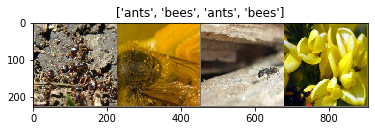

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [12]:
script_params = {
    'epochs':25,
    'batch-size':4,
    'test-batch-size':8,
    'lr':0.01,
    'momentum':0.5,
    'seed':42,
    'log-interval':10,
    #'no-cuda':False,
    'nprocs':1,
    'loss':'cross_entropy',
    #'loss':'nll_loss',
    'optimizer':'SGD',
    'validation': True,
    'debug': True    
}

In [13]:
estimator = TorchEstimator(net_name=modulename,script_params=script_params)

['--epochs', '25', '--batch-size', '4', '--test-batch-size', '8', '--lr', '0.01', '--momentum', '0.5', '--seed', '42', '--log-interval', '10', '--nprocs', '1', '--loss', 'cross_entropy', '--optimizer', 'SGD', '--validation', '--debug', '--net-name', 'resnet18']


In [14]:
estimator.fit(dataset_loader=dataset_name)

Job Requested to Portal.


In [16]:
estimator.monitor()

<IPython.core.display.Javascript object>

Phase: Train, Epoch: 1, Loss: 0.8552749752998352, Acc: 0.6885245442390442
Phase: Validation, Epoch: 1, Loss: 3.7564141750335693, Acc: 0.49673202633857727
Phase: Train, Epoch: 2, Loss: 1.0744348764419556, Acc: 0.6762294769287109
Phase: Validation, Epoch: 2, Loss: 6.49390983581543, Acc: 0.5620915293693542
Phase: Train, Epoch: 3, Loss: 1.3581806421279907, Acc: 0.5983605980873108
Phase: Validation, Epoch: 3, Loss: 4.329338550567627, Acc: 0.4575163424015045
Phase: Train, Epoch: 4, Loss: 1.2371007204055786, Acc: 0.6229507923126221
Phase: Validation, Epoch: 4, Loss: 2.6147546768188477, Acc: 0.601307213306427
Phase: Train, Epoch: 5, Loss: 0.7960559725761414, Acc: 0.7295081615447998
Phase: Validation, Epoch: 5, Loss: 0.6374605298042297, Acc: 0.7385621070861816
Phase: Train, Epoch: 6, Loss: 0.9865016937255859, Acc: 0.6557376384735107
Phase: Validation, Epoch: 6, Loss: 1.063896656036377, Acc: 0.7189542651176453
Phase: Train, Epoch: 7, Loss: 0.9875945448875427, Acc: 0.6885245442390442
Phase: Valid

<div class="alert alert-block alert-info">
<h1>Example 5(MNIST-.csv, .png)</h1>
</div>

In [17]:
# USER-DEFINED - Feel free to change
modulename = "mnist-csv"
######### DO NOT CHANGE #########
net_filename = modulename + ".py"
net_filename = "./net/" + net_filename
#################################

<div class="alert alert-block alert-warning">
    <p>Do not change code below at Line 1 to 3 </p>
    <p>Do not change class name <b>'Net'</b></p>
</div>

In [18]:
%%writefile $net_filename
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

Overwriting ./net/mnist-csv.py


<div class="alert alert-block alert-info">
Feel free to change dataset name
</div>

In [19]:
# USER-DEFINED
dataset_name = "mnist-images"
######### DO NOT CHANGE #########
dataset_filename = dataset_name + ".py"
dataset_filename = "./dataset/" + dataset_filename
#################################

In [20]:
%%writefile $dataset_filename

from __future__ import print_function, division

import torch
import torchvision
import torchvision.transforms as transforms
import os

class DatasetLoader:    
    def __init__(self):
        ########## WRITE DATASET LOADER CODE HERE ##########
        # Just normalization for validation        
        mnist_transform=transforms.Compose([transforms.Grayscale(),
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.1307,), (0.3081,))])
        thispath = os.path.dirname(os.path.abspath(__file__))
        data_dir = os.path.join(thispath,"image-datasets","mnist","images")
        image_dataset = torchvision.datasets.ImageFolder(data_dir,mnist_transform)
        
        self.train_dataset = image_dataset
        ####################################################
        
    def get_train_dataset(self, validation=True):        
        if validation is True:
            return self.train_dataset, self.valid_dataset
        else:
            return self.train_dataset
    
    def get_test_dataset(self):
        return self.test_dataset

Overwriting ./dataset/mnist-images.py


In [21]:
script_params = {
    'epochs':5,
    'batch-size':32,
    'test-batch-size':64,
    'lr':0.01,
    'momentum':0.5,
    'seed':42,
    'log-interval':10,
    'no-cuda':True,
    'nprocs':1,
    #'loss':'cross_entropy',
    'loss':'nll_loss',
    'optimizer':'SGD',
    'debug': True
}

In [22]:
estimator = TorchEstimator(net_name=modulename,script_params=script_params)

['--epochs', '5', '--batch-size', '32', '--test-batch-size', '64', '--lr', '0.01', '--momentum', '0.5', '--seed', '42', '--log-interval', '10', '--no-cuda', '--nprocs', '1', '--loss', 'nll_loss', '--optimizer', 'SGD', '--debug', '--net-name', 'mnist-csv']


In [23]:
estimator.fit(dataset_loader=dataset_name)

Job Requested to Portal.


In [28]:
estimator.monitor()

<IPython.core.display.Javascript object>

Phase: Train, Epoch: 1, Loss: 0.6833564639091492, Acc: 0.776888906955719
Phase: Train, Epoch: 2, Loss: 0.2984859049320221, Acc: 0.9113012552261353
Phase: Train, Epoch: 3, Loss: 0.23601903021335602, Acc: 0.9298866987228394
Phase: Train, Epoch: 4, Loss: 0.20504619181156158, Acc: 0.9393294453620911
Phase: Train, Epoch: 5, Loss: 0.18710005283355713, Acc: 0.94451504945755


# Other Methods

# 1. Prepare Dataset

In [ ]:
import torch
from torchvision import datasets, transforms

download_root = 'train-data'
mnist_transform=transforms.Compose([
                           transforms.ToTensor()
                           ,transforms.Normalize((0.1307,), (0.3081,))
                           ])
train_dataset  = datasets.MNIST(download_root, transform=mnist_transform, train=True, download=True)
input_data_torch = train_dataset.data
input_data_torch = torch.div(input_data_torch,255.)
input_data_torch = torch.add(input_data_torch,-0.1307)
input_data_torch = torch.div(input_data_torch,0.3081)
input_data_torch = input_data_torch.unsqueeze(1)
input_labels_torch = train_dataset.targets
# Convert Tensor to Numpy
input_data = input_data_torch.numpy()
input_labels = input_labels_torch.numpy()

<div class="alert alert-block alert-info">
    Check data type and shape
</div>

In [ ]:
print(type(input_data))
print(input_data.shape)

<div class="alert alertbox alert-info">
    Set Script Parameters
</div>

In [ ]:
script_params = {
    'epochs':5,
    'batch-size':64,
    'test-batch-size':128,
    'lr':0.01,
    'momentum':0.5,
    'seed':42,
    'log-interval':10,
    #'no-cuda': True, # True is dummy value, value is always True
    'nprocs':1,
    #'loss':'cross_entropy',
    'loss':'nll_loss',
    'optimizer':'SGD',
    'debug': True # True is dummy value, value is always True
}

## Scenario 1 (with model name in the aistudio service)

In [ ]:
estimator = TorchEstimator(model_name="model-1",script_params=script_params)

In [ ]:
estimator.fit(input_data,input_labels)

In [ ]:
# %%writefile './estimator3_test.py'

# from aistudio.estimator3 import Estimator
# import torch
# from torchvision import datasets, transforms

# download_root = 'train-data'
# mnist_transform=transforms.Compose([
#                            transforms.ToTensor()
#                            ,transforms.Normalize((0.1307,), (0.3081,))
#                            ])
# train_dataset  = datasets.MNIST(download_root, transform=mnist_transform, train=True, download=True)
# input_data_torch = train_dataset.data
# input_data_torch = torch.div(input_data_torch,255.)
# input_data_torch = torch.add(input_data_torch,-0.1307)
# input_data_torch = torch.div(input_data_torch,0.3081)
# input_data_torch = input_data_torch.unsqueeze(1)
# input_labels_torch = train_dataset.targets
# # Convert Tensor to Numpy
# input_data = input_data_torch.numpy()
# input_labels = input_labels_torch.numpy()
# script_params = {
#     'epochs':5,
#     'batch-size':64,
#     'test-batch-size':128,
#     'lr':0.01,
#     'momentum':0.5,
#     'seed':42,
#     'log-interval':10,
#     'no-cuda':False,
#     'nprocs':1,
#     'loss':'cross_entropy',
#     'optimizer':'SGD'
# }
# estimator = Estimator(model_name="model-1",script_params=script_params)
# estimator.fit(input_data,input_labels)